In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_theme()

In [ ]:
import matplotlib.pyplot as plt

SMALL_SIZE = 15
MEDIUM_SIZE = 18
BIGGER_SIZE = 20

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [ ]:
df= pd.read_csv('/content/drive/MyDrive/Crash_Analysis_System_(CAS)_data.csv')
df.head()

,X,Y,OBJECTID,advisorySpeed,areaUnitID,bicycle,bridge,bus,carStationWagon,cliffBank,crashDirectionDescription,crashFinancialYear,crashLocation1,crashLocation2,crashRoadSideRoad,crashSeverity,crashSHDescription,crashYear,debris,directionRoleDescription,ditch,fatalCount,fence,flatHill,guardRail,holiday,houseOrBuilding,intersection,kerb,light,meshblockId,minorInjuryCount,moped,motorcycle,NumberOfLanes,objectThrownOrDropped,otherObject,otherVehicleType,overBank,parkedVehicle,pedestrian,phoneBoxEtc,postOrPole,region,roadCharacter,roadLane,roadSurface,roadworks,schoolBus,seriousInjuryCount,slipOrFlood,speedLimit,strayAnimal,streetLight,suv,taxi,temporarySpeedLimit,tlaId,tlaName,trafficControl,trafficIsland,trafficSign,train,tree,truck,unknownVehicleType,urban,vanOrUtility,vehicle,waterRiver,weatherA,weatherB
0,1406914.0,4915023.0,1,NaN,602800.0,0.0,NaN,0.0,1.0,NaN,Null,2000/2001,MIDLAND ST,PORTSMOUTH DRIVE,NaN,Non-Injury Crash,No,2000,NaN,East,NaN,0.0,NaN,Flat,NaN,NaN,NaN,NaN,NaN,Overcast,2895200.0,0.0,0.0,0.0,2.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,Otago Region,Nil,2-way,Sealed,NaN,0.0,0.0,NaN,70.0,NaN,Null,0.0,0.0,NaN,71.0,Dunedin City,Give way,NaN,NaN,NaN,NaN,0.0,0.0,Urban,1.0,NaN,NaN,Fine,Null
1,1799023.0,5814728.0,2,NaN,528900.0,0.0,NaN,0.0,3.0,NaN,North,2011/2012,SH 1N,KILLARNEY ROAD,NaN,Non-Injury Crash,Yes,2012,NaN,South,NaN,0.0,NaN,Flat,NaN,NaN,NaN,NaN,NaN,Bright sun,915900.0,0.0,0.0,0.0,4.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,Waikato Region,Nil,2-way,Sealed,NaN,0.0,0.0,NaN,60.0,NaN,Null,0.0,0.0,NaN,16.0,Hamilton City,Unknown,NaN,NaN,NaN,NaN,0.0,0.0,Urban,0.0,NaN,NaN,Fine,Null
2,1741193.0,5976099.0,3,55.0,506660.0,0.0,0.0,0.0,1.0,1.0,North,2006/2007,SH 1N,SAUNDERS ROAD,NaN,Non-Injury Crash,Yes,2007,0.0,North,0.0,0.0,0.0,Flat,0.0,NaN,0.0,NaN,0.0,Twilight,136700.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,Auckland Region,Bridge,2-way,Sealed,0.0,0.0,0.0,0.0,100.0,0.0,None,0.0,0.0,NaN,76.0,Auckland,Nil,0.0,0.0,0.0,0.0,0.0,0.0,Open,0.0,0.0,0.0,Light rain,Null
3,1790288.0,5837387.0,4,NaN,526601.0,0.0,0.0,0.0,1.0,1.0,North,2006/2007,RIVERVIEW ROAD,HAKARIMATA ROAD,NaN,Non-Injury Crash,No,2006,0.0,North,0.0,0.0,0.0,Flat,0.0,NaN,0.0,NaN,0.0,Overcast,852200.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,Waikato Region,Nil,2-way,Sealed,0.0,0.0,0.0,0.0,100.0,0.0,None,0.0,0.0,NaN,13.0,Waikato District,Nil,0.0,0.0,0.0,0.0,0.0,0.0,Open,0.0,0.0,0.0,Light rain,Null
4,1615675.0,5423627.0,5,NaN,584201.0,0.0,NaN,0.0,2.0,NaN,Null,2003/2004,TALBOT ST,ELIZABETH ST,NaN,Non-Injury Crash,No,2003,NaN,West,NaN,0.0,NaN,Flat,NaN,NaN,NaN,NaN,NaN,Overcast,2361500.0,0.0,0.0,0.0,2.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,Tasman Region,Nil,2-way,Sealed,NaN,0.0,0.0,NaN,50.0,NaN,Null,0.0,0.0,NaN,51.0,Tasman District,Give way,NaN,NaN,NaN,NaN,0.0,0.0,Urban,0.0,NaN,NaN,Fine,Null


In [ ]:
df.columns

Index(['X', 'Y', 'OBJECTID', 'advisorySpeed', 'areaUnitID', 'bicycle',
       'bridge', 'bus', 'carStationWagon', 'cliffBank',
       'crashDirectionDescription', 'crashFinancialYear', 'crashLocation1',
       'crashLocation2', 'crashRoadSideRoad', 'crashSeverity',
       'crashSHDescription', 'crashYear', 'debris', 'directionRoleDescription',
       'ditch', 'fatalCount', 'fence', 'flatHill', 'guardRail', 'holiday',
       'houseOrBuilding', 'intersection', 'kerb', 'light', 'meshblockId',
       'minorInjuryCount', 'moped', 'motorcycle', 'NumberOfLanes',
       'objectThrownOrDropped', 'otherObject', 'otherVehicleType', 'overBank',
       'parkedVehicle', 'pedestrian', 'phoneBoxEtc', 'postOrPole', 'region',
       'roadCharacter', 'roadLane', 'roadSurface', 'roadworks', 'schoolBus',
       'seriousInjuryCount', 'slipOrFlood', 'speedLimit', 'strayAnimal',
       'streetLight', 'suv', 'taxi', 'temporarySpeedLimit', 'tlaId', 'tlaName',
       'trafficControl', 'trafficIsland', 'trafficSi

In [ ]:
df.shape

(758757, 72)

In [ ]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 758757 entries, 0 to 758756
Data columns (total 72 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   X                          758757 non-null  float64
 1   Y                          758757 non-null  float64
 2   OBJECTID                   758757 non-null  int64  
 3   advisorySpeed              28369 non-null   float64
 4   areaUnitID                 758675 non-null  float64
 5   bicycle                    758752 non-null  float64
 6   bridge                     301585 non-null  float64
 7   bus                        758752 non-null  float64
 8   carStationWagon            758752 non-null  float64
 9   cliffBank                  301585 non-null  float64
 10  crashDirectionDescription  758757 non-null  object 
 11  crashFinancialYear         758757 non-null  object 
 12  crashLocation1             758757 non-null  object 
 13  crashLocation2             75

In [ ]:
null_df= df.isna().sum().reset_index(name="n")

null_df.sort_values('n', ascending= False, inplace= True)
null_df.head(10)

,index,n
27,intersection,758757
14,crashRoadSideRoad,758757
56,temporarySpeedLimit,748034
40,pedestrian,734561
3,advisorySpeed,730388
25,holiday,717808
36,otherObject,457172
61,trafficSign,457172
24,guardRail,457172
26,houseOrBuilding,457172


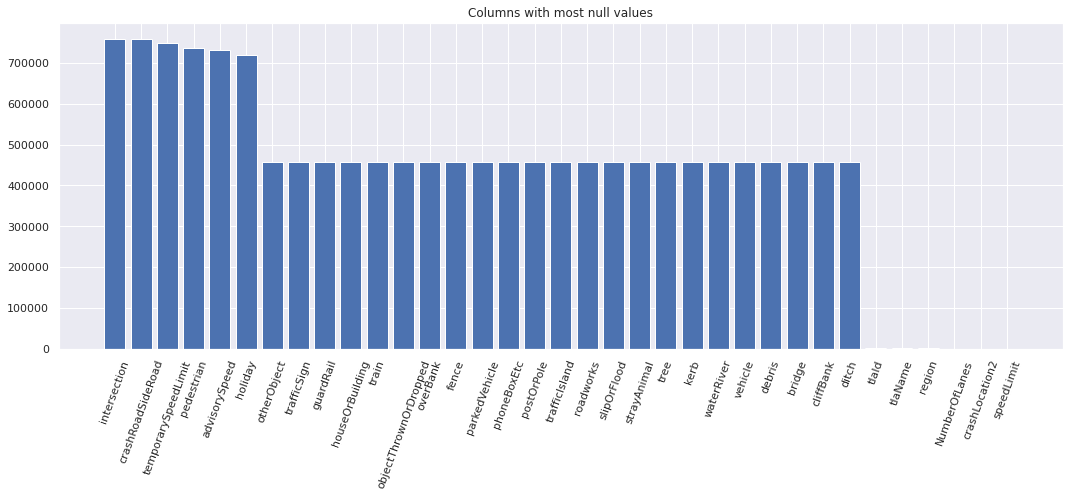

In [ ]:
fig = plt.figure(figsize =(18, 6))
plt.bar( 'index' , 'n', data= null_df.head(35))
plt.xticks(rotation= 70)
plt.rc('xtick', labelsize=9)    # fontsize of the tick labels
plt.title('Columns with most null values')
plt.show()

In [ ]:
df2= df.drop(['intersection', 'crashRoadSideRoad', 'temporarySpeedLimit','pedestrian', 'advisorySpeed', 'holiday' ], axis= 1 )
df_with_most_null_vals = df[['intersection', 'crashRoadSideRoad', 'temporarySpeedLimit','pedestrian', 'advisorySpeed', 'holiday']]

#Speed limit and advisory speed

No handles with labels found to put in legend.


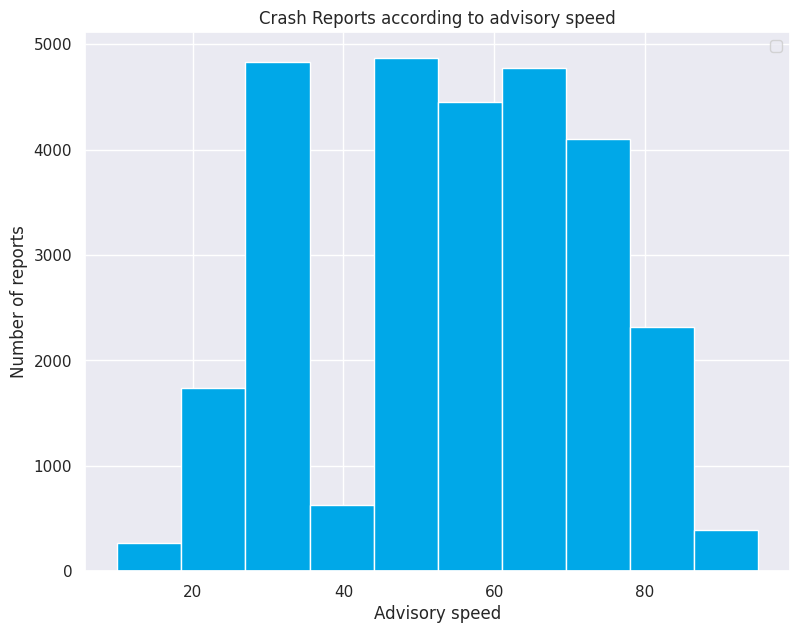

In [ ]:
plt.figure(figsize=(20,7))
plt.subplot(1,2,1)
plt.hist(df.advisorySpeed, color= '#00a8e8')
plt.title('Crash Reports according to advisory speed')
plt.xlabel('Advisory speed')
plt.ylabel('Number of reports')
plt.legend()

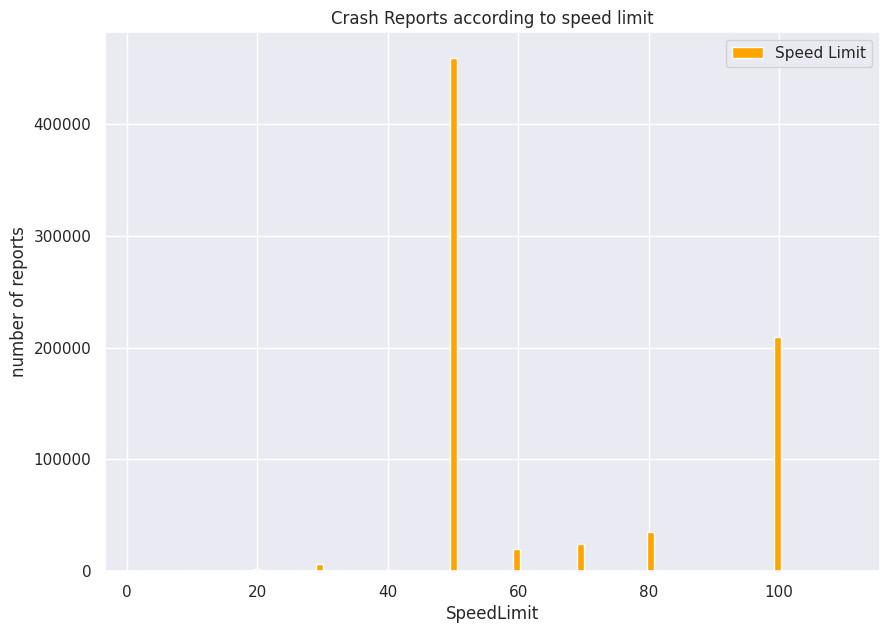

In [ ]:
#plt.subplot(1,2,2)
plt.figure(figsize=(10,7))
plt.hist(df.speedLimit, label='Speed Limit', color = 'orange', bins=100)
plt.title('Crash Reports according to speed limit')
plt.xlabel('SpeedLimit')
plt.ylabel('number of reports')
plt.legend()
plt.show()

In [ ]:
speed = df.speedLimit.value_counts().index
value = df.speedLimit.value_counts()
speed = pd.DataFrame({'Speed Limit' : speed , 'Crash Counts' : value})
speed.reset_index().drop(['index'], axis= 1)

,Speed Limit,Crash Counts
0,50.0,458963
1,100.0,209489
2,80.0,35455
3,70.0,24041
4,60.0,19811
5,30.0,6180
6,20.0,1889
7,40.0,1263
8,10.0,726
9,90.0,385


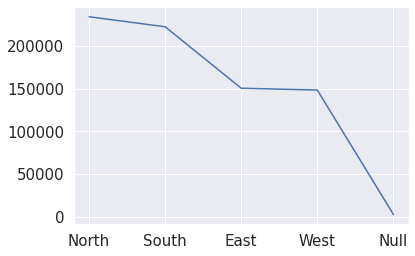

In [ ]:
plt.plot(df.directionRoleDescription.value_counts())

#According to Weather

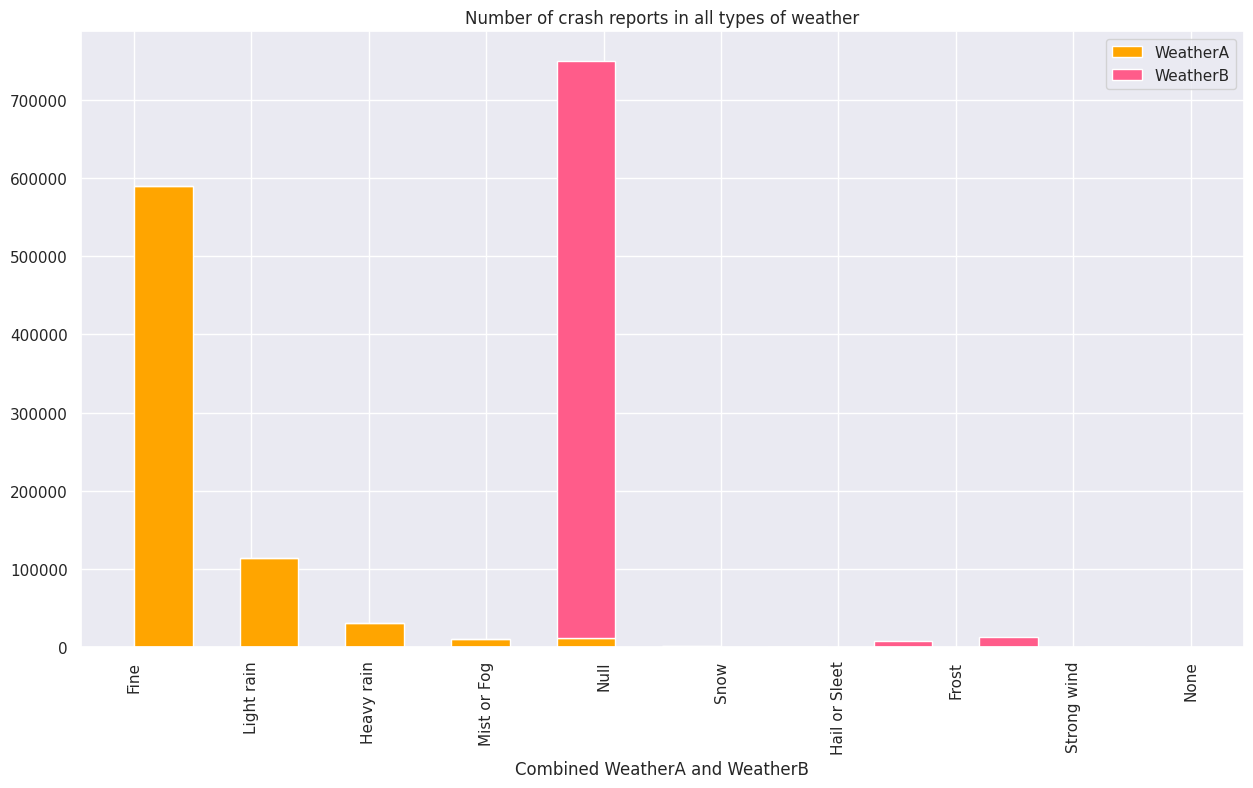

In [ ]:
#w_df = df[df.weatherB != 'Null']
w_df = df
plt.figure(figsize= (15,8))
plt.hist([w_df.weatherA, w_df.weatherB], histtype= 'barstacked', label=['WeatherA', 'WeatherB'], color= ['orange', '#ff5c8a'], bins= 10, width= .5)
plt.xticks(rotation= 90)
plt.title('Number of crash reports in all types of weather')
plt.xlabel('Combined WeatherA and WeatherB')
plt.legend()
plt.show()

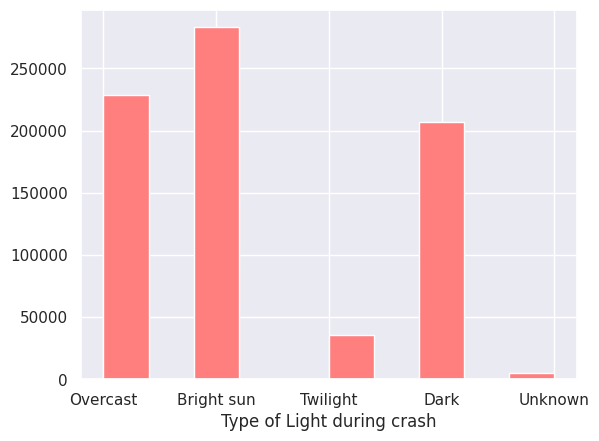

In [ ]:
plt.hist(df.light, color= '#ff7f7f')
plt.xlabel('Type of Light during crash')
plt.show()

In [ ]:
df.light.value_counts()

Bright sun    283105
Overcast      228978
Dark          206535
Twilight       35368
Unknown         4771
Name: light, dtype: int64

#According to Regions

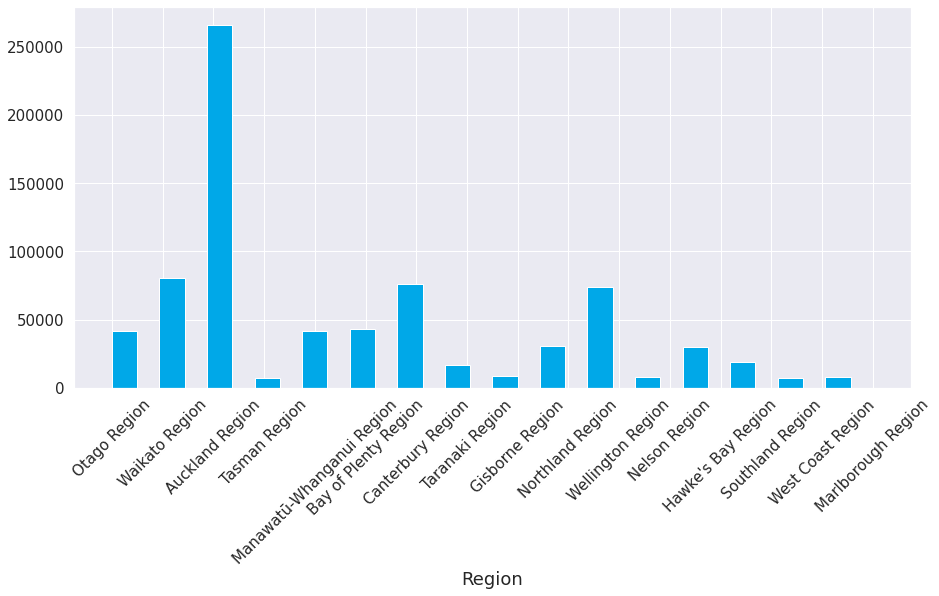

In [ ]:
df1 = df
df1['region']= df1['region'].fillna('none')
df1= df1[df1.region != 'none']
df1.region.unique()

plt.figure(figsize= (15 ,7))
plt.hist(df1.region,bins= 16,width= .5, color= '#00a8e8')
plt.xticks(rotation = 45 )
plt.xlabel('Region')
plt.show()

In [ ]:
df.tlaName.value_counts()

Auckland                     266242
Christchurch City             49475
Wellington City               30541
Hamilton City                 26336
Dunedin City                  23133
                              ...  
Waimate District               1270
Carterton District             1167
Kaikoura District              1154
Kawerau District                326
Chatham Islands Territory       174
Name: tlaName, Length: 67, dtype: int64

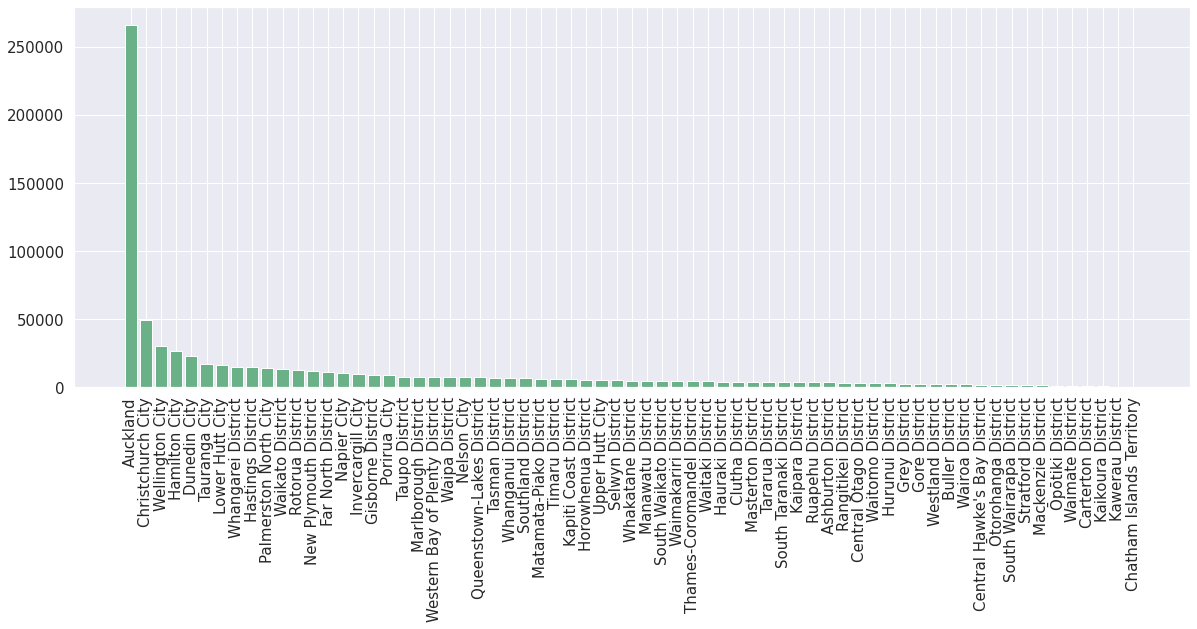

In [ ]:
#px.bar(df.tlaName.value_counts(), color= df.tlaName.value_counts().index, title= 'TLA Names')
plt.figure(figsize=(20, 7))
plt.bar(df.tlaName.value_counts().index, df.tlaName.value_counts(), color= '#6ab187' )
plt.rc('xtick', labelsize=14)    # fontsize of the tick labels
plt.xticks(rotation = 90)
plt.show()

0      423600
1      637300
2      494902
3      366700
4      425600
5      178900
6      183800
7      780209
8      639500
9      612300
10    2078302
11    2003709
12     727200
13     780302
14    2118400
15     443200
16    3039900
17     435500
18     359300
19     781302
Name: meshblockId, dtype: int64

In [ ]:
#plt.hist(df.areaUnitID)
l = df.areaUnitID.value_counts()
l_index = df.areaUnitID.value_counts().index 

area = pd.DataFrame({'areaUnitID' : l_index , 'Counts' : l})

plt.figure(figsize=(20, 5))
plt.bar( 'areaUnitID','Counts', data = area.head(10))
plt.xticks(area.areaUnitID.iloc[0:10], rotation =90)
plt.show()

In [ ]:
area.reset_index().drop(['index'],axis= 1).tail(10)

,areaUnitID,Counts
1865,620000.0,2
1866,545206.0,2
1867,612901.0,1
1868,610075.0,1
1869,626801.0,1
1870,526400.0,1
1871,506620.0,1
1872,520900.0,1
1873,531600.0,1
1874,559240.0,1


In [ ]:
df.areaUnitID.nunique()

1875

In [ ]:
df.areaU

#Injury and Fatal counts

Crash Severity

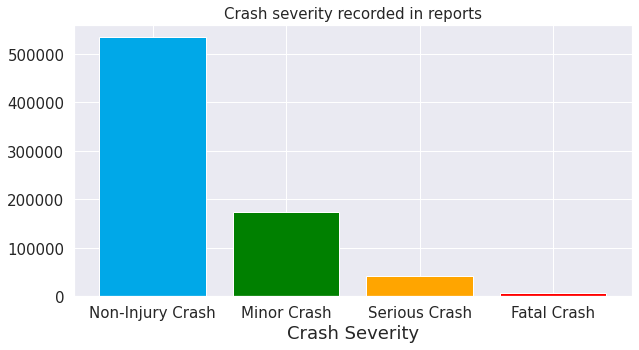

In [ ]:
plt.figure(figsize=(10,5))
l =df.crashSeverity.value_counts()
plt.bar(l.index,l, color=['#00a8e8', 'green', 'orange', 'red'])
plt.xlabel('Crash Severity')
plt.title('Crash severity recorded in reports')
plt.show()

In [ ]:
l

Non-Injury Crash    534058
Minor Crash         174849
Serious Crash        42884
Fatal Crash           6966
Name: crashSeverity, dtype: int64

In [ ]:
px.bar(df.crashSeverity.value_counts(), color= df.crashSeverity.value_counts().index, color_discrete_sequence=px.colors.qualitative.G10_r )

Minor injury counts

In [ ]:
l = df.minorInjuryCount.value_counts()
injury=  pd.DataFrame({'injury_counts' : l})
injury.head()

,injury_counts
0.0,570067
1.0,151060
2.0,28005
3.0,6476
4.0,2040


fatal counts

In [ ]:
l=df.fatalCount.value_counts()
fatal=  pd.DataFrame({'fatal_counts' : l})
fatal

,fatal_counts
0.0,751654
1.0,6284
2.0,524
3.0,109
4.0,37
5.0,6
6.0,3
7.0,1
8.0,1
9.0,1


#Plotly plots

In [ ]:
#!pip install jupyter-dash

import plotly.graph_objects as go
import plotly.express as px
from jupyter_dash import JupyterDash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output 

##**Chart for region**

In [ ]:
l= df1.region.value_counts()

px.bar(l, color= l.index, title= 'Crash reports according to regions' )

In [ ]:
px.bar(df.tlaName.value_counts(), color= df.tlaName.value_counts().index, title= 'TLA Names')

In [ ]:
px.bar(df.crashLocation1.value_counts().head(50), title= 'Top Crash reports in crash location1')

In [ ]:
print('crashLocation1 unique values', len(df.crashLocation1.value_counts()))
print('crashLocation2 unique values', len(df.crashLocation2.value_counts()))

len(df.crashLocation1), len(df.crashLocation2)

crashLocation1 unique values 35658
crashLocation2 unique values 49732


(758757, 758757)

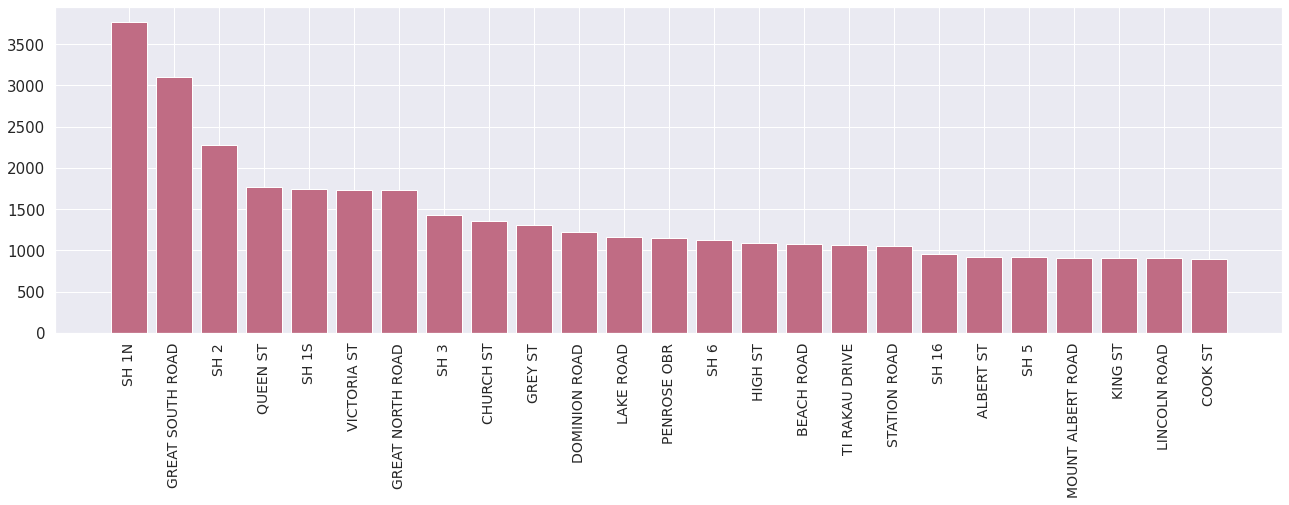

In [ ]:
l = df.crashLocation2.value_counts()
l_index = df.crashLocation2.value_counts().index
c_loc2 = pd.DataFrame({'crashLocation2': l_index, 'CrashCounts': l} )
c_loc2 = c_loc2.reset_index().drop(['index'], axis= 1)

plt.figure(figsize=(22, 6))
plt.bar('crashLocation2', 'CrashCounts' ,data = c_loc2.head(25), color= '#c06c84')
plt.rc('xtick', labelsize= 10)
plt.xticks(rotation= 90)
plt.show()

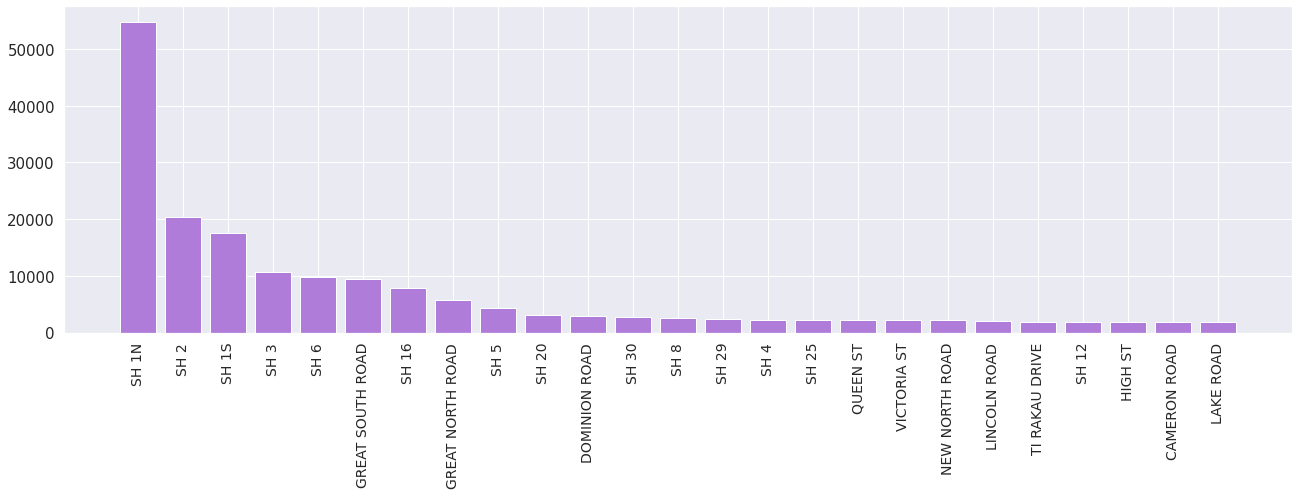

In [ ]:
l = df.crashLocation1.value_counts()
l_index = df.crashLocation1.value_counts().index
c_loc2 = pd.DataFrame({'crashLocation1': l_index, 'CrashCounts': l} )
c_loc2 = c_loc2.reset_index().drop(['index'], axis= 1)

plt.figure(figsize=(22, 6))
plt.bar('crashLocation1', 'CrashCounts' ,data = c_loc2.head(25), color= '#b07cda')
plt.rc('xtick', labelsize= 14)
plt.xticks(rotation= 90)
plt.show()

##Chart according to years

In [ ]:
px.bar(df.crashYear.value_counts(), title= 'Crash Report counts according to each year', color_discrete_sequence=px.colors.qualitative.D3_r)

In [ ]:
px.bar(df1.crashFinancialYear.value_counts(), color= df1.crashFinancialYear.value_counts().index, title= 'Crash report count according to Financial years', color_discrete_sequence= px.colors.qualitative.Set2)

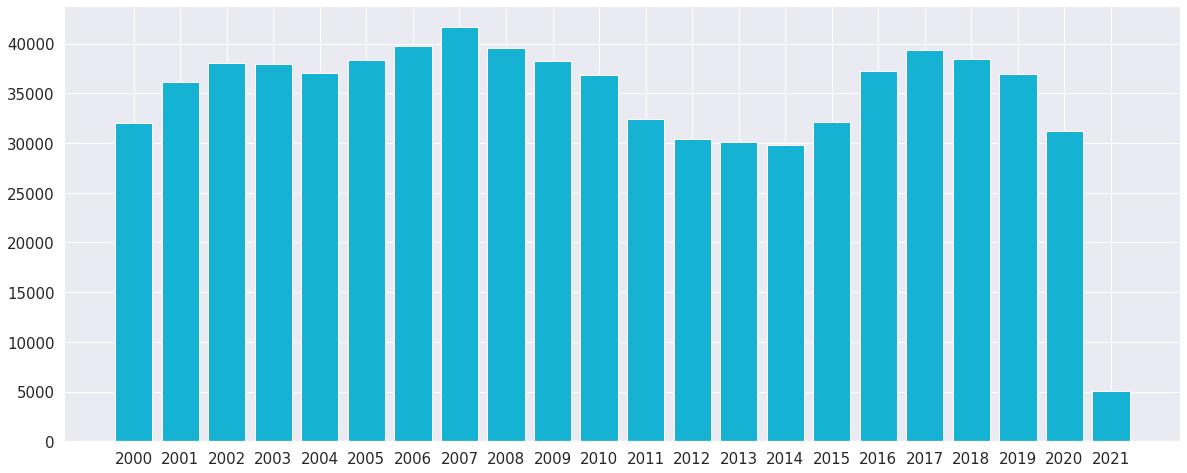

In [ ]:
plt.figure(figsize=(20,8))
#plt.hist(df.crashYear, bins = 22)
plt.bar(df.crashYear.value_counts().index ,df.crashYear.value_counts(), color= '#15b2d3')
plt.xticks(df.crashYear.value_counts().index)
plt.show()

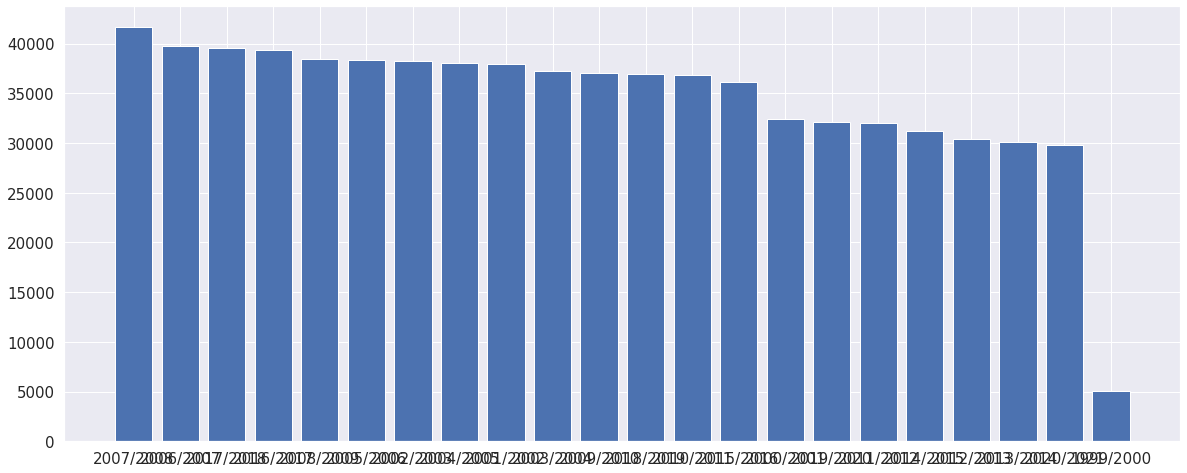

In [ ]:
plt.figure(figsize=(20,8))
#plt.hist(df.crashYear, bins = 22)
plt.bar(df.crashFinancialYear.value_counts().index ,df.crashYear.value_counts())
plt.xticks(df.crashFinancialYear.value_counts().index)
plt.show()

In [ ]:
df.crashYear.value_counts()

2007    41661
2006    39778
2008    39535
2017    39316
2018    38471
2005    38364
2009    38247
2002    38045
2003    37950
2016    37249
2004    37051
2019    36920
2010    36870
2001    36125
2011    32449
2015    32104
2000    31996
2020    31239
2012    30444
2013    30109
2014    29784
2021     5050
Name: crashYear, dtype: int64

#Information about vehicles and objects involved during crash

In [ ]:
vehicles= pd.DataFrame([df.truck.value_counts(), df.taxi.value_counts(), df.suv.value_counts(), df.bus.value_counts(),
                        df.motorcycle.value_counts(),df.moped.value_counts(),df.schoolBus.value_counts(),df.otherVehicleType.value_counts(),
                        df.pedestrian.value_counts(), df.train.value_counts(), df.tree.value_counts()])
vehicles.fillna(0, inplace= True)
vehicles

,0.0,1.0,2.0,3.0,4.0,5.0,6.0,8.0
truck,699803.0,56694.0,2189.0,60.0,4.0,2.0,0.0,0.0
taxi,750730.0,7793.0,221.0,7.0,0.0,1.0,0.0,0.0
suv,685575.0,69035.0,4002.0,131.0,8.0,0.0,1.0,0.0
bus,746742.0,11889.0,117.0,4.0,0.0,0.0,0.0,0.0
motorcycle,732410.0,25733.0,537.0,53.0,8.0,8.0,2.0,1.0
moped,753313.0,5415.0,22.0,1.0,1.0,0.0,0.0,0.0
schoolBus,758237.0,511.0,4.0,0.0,0.0,0.0,0.0,0.0
otherVehicleType,755282.0,3421.0,49.0,0.0,0.0,0.0,0.0,0.0
pedestrian,0.0,23425.0,655.0,95.0,17.0,3.0,1.0,0.0
train,301110.0,475.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df.columns

Index(['X', 'Y', 'OBJECTID', 'advisorySpeed', 'areaUnitID', 'bicycle',
       'bridge', 'bus', 'carStationWagon', 'cliffBank',
       'crashDirectionDescription', 'crashFinancialYear', 'crashLocation1',
       'crashLocation2', 'crashRoadSideRoad', 'crashSeverity',
       'crashSHDescription', 'crashYear', 'debris', 'directionRoleDescription',
       'ditch', 'fatalCount', 'fence', 'flatHill', 'guardRail', 'holiday',
       'houseOrBuilding', 'intersection', 'kerb', 'light', 'meshblockId',
       'minorInjuryCount', 'moped', 'motorcycle', 'NumberOfLanes',
       'objectThrownOrDropped', 'otherObject', 'otherVehicleType', 'overBank',
       'parkedVehicle', 'pedestrian', 'phoneBoxEtc', 'postOrPole', 'region',
       'roadCharacter', 'roadLane', 'roadSurface', 'roadworks', 'schoolBus',
       'seriousInjuryCount', 'slipOrFlood', 'speedLimit', 'strayAnimal',
       'streetLight', 'suv', 'taxi', 'temporarySpeedLimit', 'tlaId', 'tlaName',
       'trafficControl', 'trafficIsland', 'trafficSi

In [ ]:
vehicles = df[['truck', 'taxi', 'bus', 'suv', 'motorcycle', 'moped', 'schoolBus', 'train','carStationWagon',
               'bicycle','vanOrUtility', 'vehicle', 'otherVehicleType']]
vehicles.fillna(0, inplace= True)
vehicles.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4327: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


,truck,taxi,bus,suv,motorcycle,moped,schoolBus,train,carStationWagon,bicycle,vanOrUtility,vehicle,otherVehicleType
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0


<Figure size 1296x720 with 0 Axes>

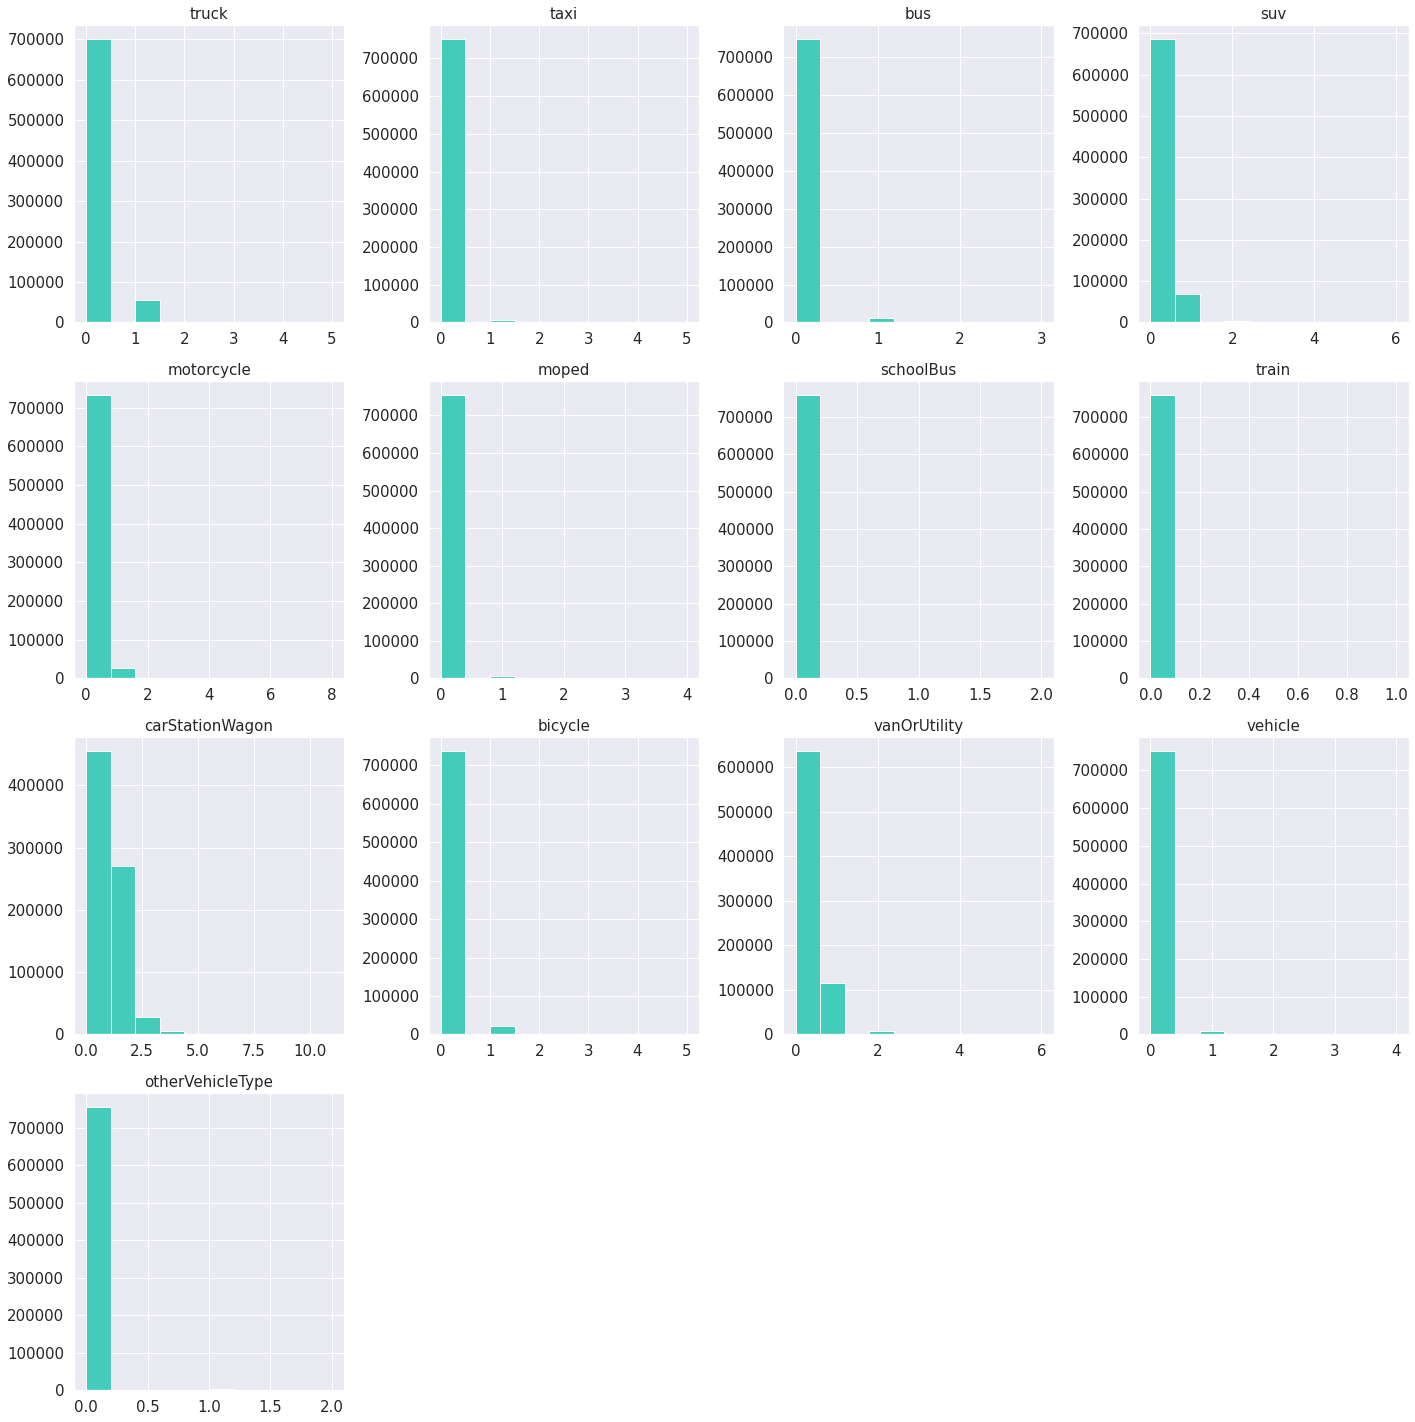

In [ ]:
plt.figure(figsize=(18,10))
vehicles.hist(figsize=(20,20), color = '#4cb')
plt.rc('axes', titlesize=18)     # fontsize of the axes title
plt.tight_layout()
plt.show()

In [ ]:
df.columns

Index(['X', 'Y', 'OBJECTID', 'advisorySpeed', 'areaUnitID', 'bicycle',
       'bridge', 'bus', 'carStationWagon', 'cliffBank',
       'crashDirectionDescription', 'crashFinancialYear', 'crashLocation1',
       'crashLocation2', 'crashRoadSideRoad', 'crashSeverity',
       'crashSHDescription', 'crashYear', 'debris', 'directionRoleDescription',
       'ditch', 'fatalCount', 'fence', 'flatHill', 'guardRail', 'holiday',
       'houseOrBuilding', 'intersection', 'kerb', 'light', 'meshblockId',
       'minorInjuryCount', 'moped', 'motorcycle', 'NumberOfLanes',
       'objectThrownOrDropped', 'otherObject', 'otherVehicleType', 'overBank',
       'parkedVehicle', 'pedestrian', 'phoneBoxEtc', 'postOrPole', 'region',
       'roadCharacter', 'roadLane', 'roadSurface', 'roadworks', 'schoolBus',
       'seriousInjuryCount', 'slipOrFlood', 'speedLimit', 'strayAnimal',
       'streetLight', 'suv', 'taxi', 'temporarySpeedLimit', 'tlaId', 'tlaName',
       'trafficControl', 'trafficIsland', 'trafficSi

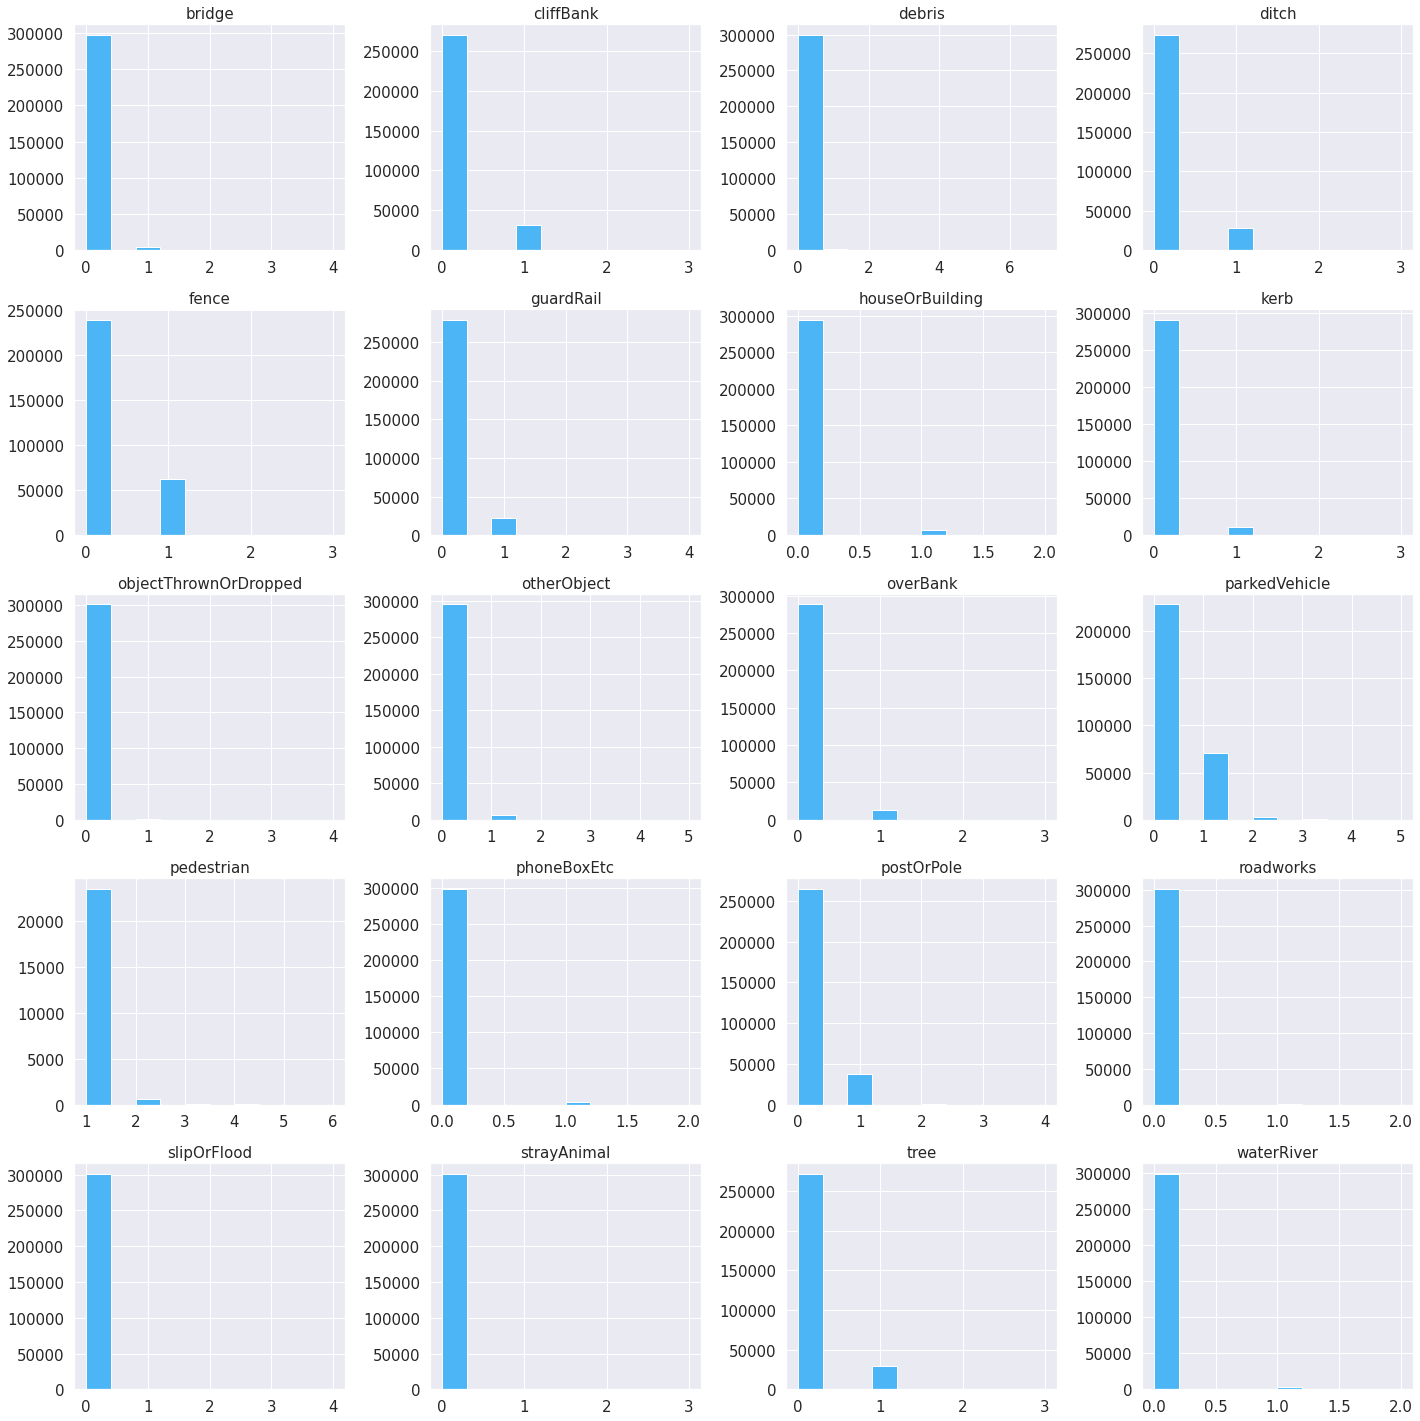

In [ ]:
objects = df[['bridge','cliffBank' ,  'debris', 'ditch', 'fence', 'guardRail', 'houseOrBuilding', 'kerb' , 'objectThrownOrDropped',
              'otherObject', 'overBank', 'parkedVehicle', 'pedestrian', 'phoneBoxEtc', 'postOrPole', 'roadworks',
              'slipOrFlood', 'strayAnimal', 'streetLight', 'tree', 'waterRiver'  ]]

objects.hist(figsize=(20,20), color = '#4cb5f5')
plt.rc('axes', titlesize=18)     # fontsize of the axes title
plt.tight_layout()
plt.show()

In [ ]:
df.columns

Index(['X', 'Y', 'OBJECTID', 'advisorySpeed', 'areaUnitID', 'bicycle',
       'bridge', 'bus', 'carStationWagon', 'cliffBank',
       'crashDirectionDescription', 'crashFinancialYear', 'crashLocation1',
       'crashLocation2', 'crashRoadSideRoad', 'crashSeverity',
       'crashSHDescription', 'crashYear', 'debris', 'directionRoleDescription',
       'ditch', 'fatalCount', 'fence', 'flatHill', 'guardRail', 'holiday',
       'houseOrBuilding', 'intersection', 'kerb', 'light', 'meshblockId',
       'minorInjuryCount', 'moped', 'motorcycle', 'NumberOfLanes',
       'objectThrownOrDropped', 'otherObject', 'otherVehicleType', 'overBank',
       'parkedVehicle', 'pedestrian', 'phoneBoxEtc', 'postOrPole', 'region',
       'roadCharacter', 'roadLane', 'roadSurface', 'roadworks', 'schoolBus',
       'seriousInjuryCount', 'slipOrFlood', 'speedLimit', 'strayAnimal',
       'streetLight', 'suv', 'taxi', 'temporarySpeedLimit', 'tlaId', 'tlaName',
       'trafficControl', 'trafficIsland', 'trafficSi

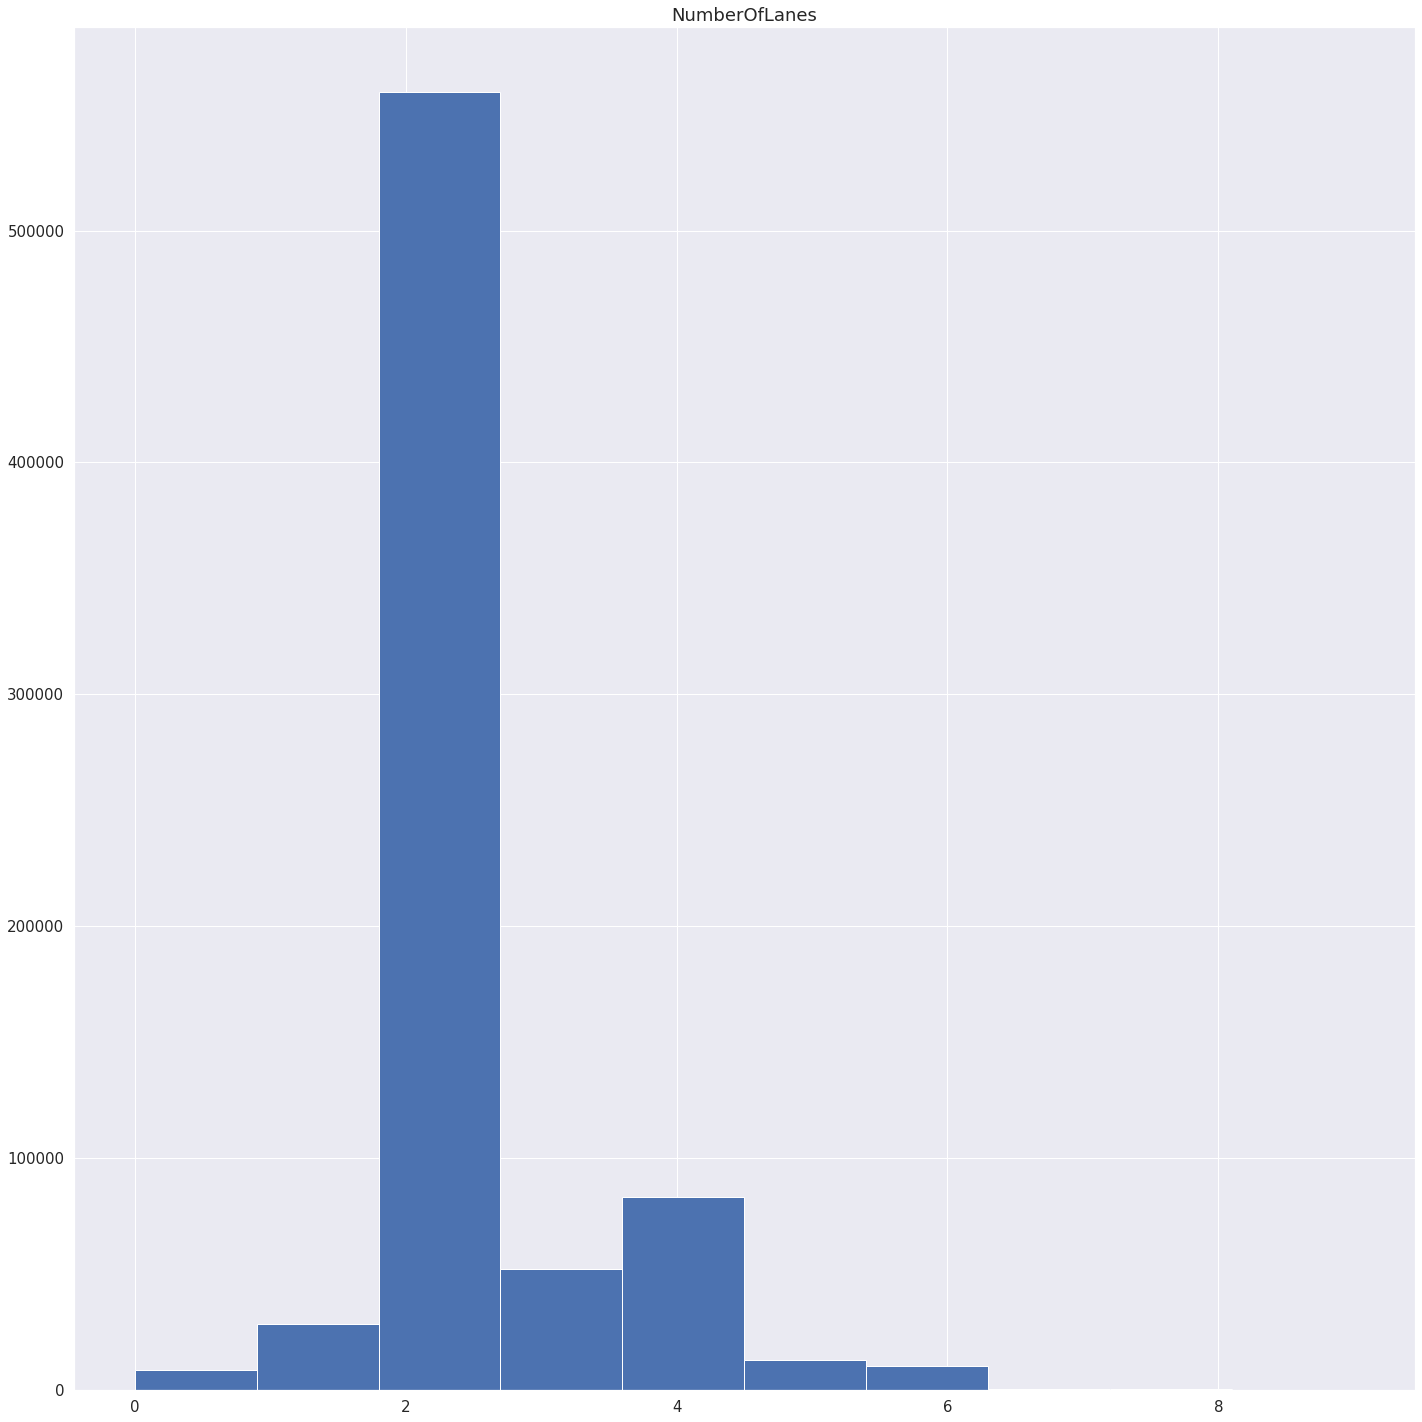

In [ ]:
road = df[['flatHill' , 'NumberOfLanes', 'roadCharacter', 'roadLane', 'roadSurface']]
road.hist(figsize=(20,20))
plt.rc('axes', titlesize=18)    
plt.tight_layout()
plt.show()

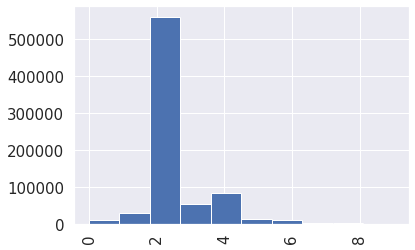

In [ ]:
df.roadCharacter.value_counts()
plt.hist(df.NumberOfLanes)
plt.xticks(rotation = 90)
plt.show()

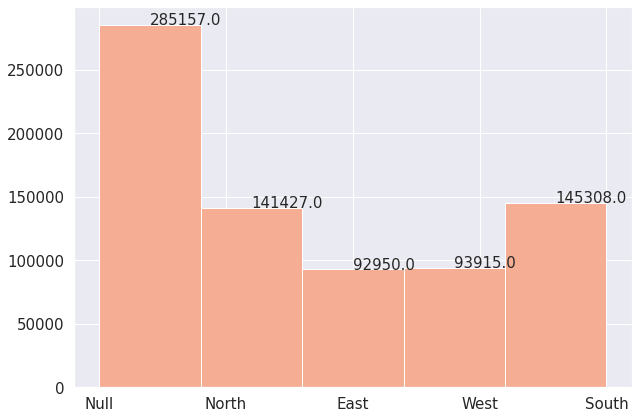

In [ ]:
plt.figure(figsize=(10, 7))
_, _, patches = plt.hist(df.crashDirectionDescription, align="mid", bins = 5, color= '#f5ad94')

for pp in patches:
   x = (pp._x0 + pp._x1)/2
   y = pp._y1
   plt.text(x, y, pp._y1)

plt.show()

In [ ]:
df.columns

Index(['X', 'Y', 'OBJECTID', 'advisorySpeed', 'areaUnitID', 'bicycle',
       'bridge', 'bus', 'carStationWagon', 'cliffBank',
       'crashDirectionDescription', 'crashFinancialYear', 'crashLocation1',
       'crashLocation2', 'crashRoadSideRoad', 'crashSeverity',
       'crashSHDescription', 'crashYear', 'debris', 'directionRoleDescription',
       'ditch', 'fatalCount', 'fence', 'flatHill', 'guardRail', 'holiday',
       'houseOrBuilding', 'intersection', 'kerb', 'light', 'meshblockId',
       'minorInjuryCount', 'moped', 'motorcycle', 'NumberOfLanes',
       'objectThrownOrDropped', 'otherObject', 'otherVehicleType', 'overBank',
       'parkedVehicle', 'pedestrian', 'phoneBoxEtc', 'postOrPole', 'region',
       'roadCharacter', 'roadLane', 'roadSurface', 'roadworks', 'schoolBus',
       'seriousInjuryCount', 'slipOrFlood', 'speedLimit', 'strayAnimal',
       'streetLight', 'suv', 'taxi', 'temporarySpeedLimit', 'tlaId', 'tlaName',
       'trafficControl', 'trafficIsland', 'trafficSi

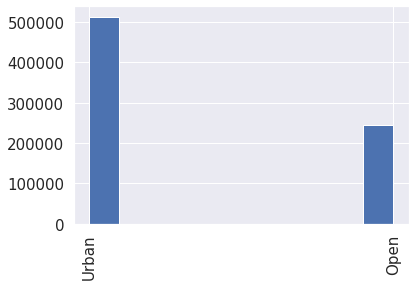

In [ ]:
plt.hist(df.urban)
plt.xticks(rotation = 90)
plt.show()